# Chapter 8: Dimensionality Reduction - Notebook Reproduksi Kode

Bab ini mengeksplorasi teknik reduksi dimensi, yang penting untuk menangani
dataset dengan banyak fitur, mengurangi waktu pelatihan, dan memungkinkan visualisasi.

Kita akan melihat:
- Kutukan Dimensionalitas (The Curse of Dimensionality)
- Pendekatan Utama: Proyeksi dan Manifold Learning
- Principal Component Analysis (PCA)
- Kernel PCA
- Locally Linear Embedding (LLE)
- Teknik reduksi dimensi lainnya.

--- The Curse of Dimensionality (Konseptual) ---
Semakin tinggi dimensi, semakin jarang (sparse) data,
membuat pencarian pola menjadi sulit dan risiko overfitting tinggi.

--- PCA (Principal Component Analysis) ---
Dataset 3D asli:


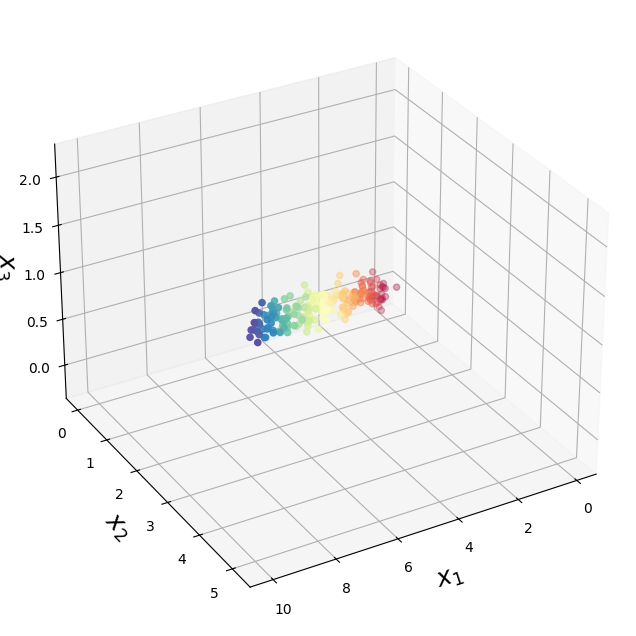

Bentuk data asli (3D): (200, 3)
Bentuk data setelah PCA (2D): (200, 2)

Data 2D setelah Proyeksi PCA:


/tmp/ipython-input-3-2227506910.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral")


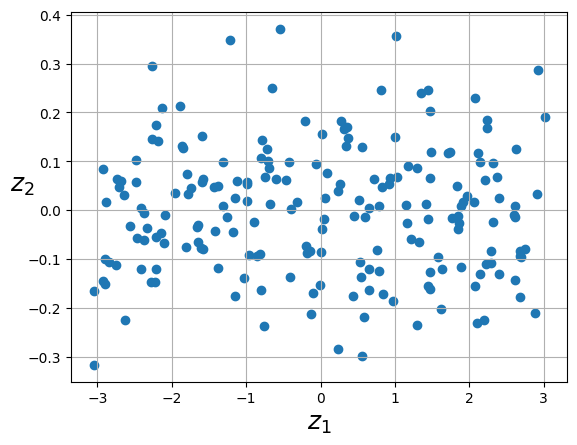


Explained Variance Ratio:
[0.99350691 0.0056971 ]
Total Explained Variance (2 komponen): 0.9992


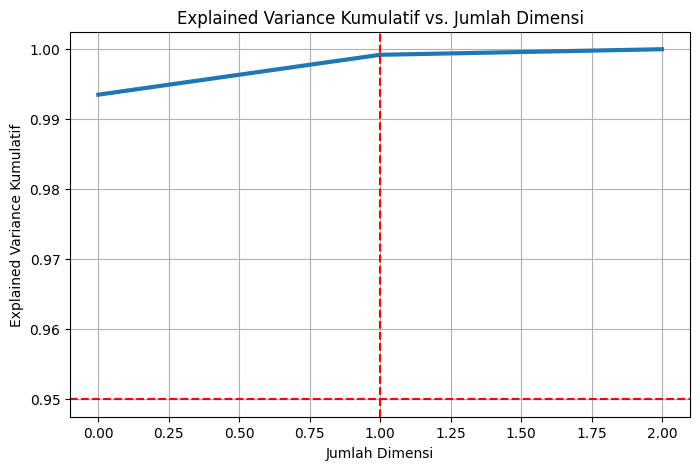

Jumlah dimensi yang diperlukan untuk mempertahankan 95% variansi: 1
Bentuk data setelah PCA (95% variansi): (200, 1)

--- PCA untuk Kompresi (MNIST) ---
Bentuk MNIST asli: (60000, 784)
Bentuk MNIST setelah PCA (95% variansi): (60000, 154)
Jumlah komponen yang dipilih PCA: 154


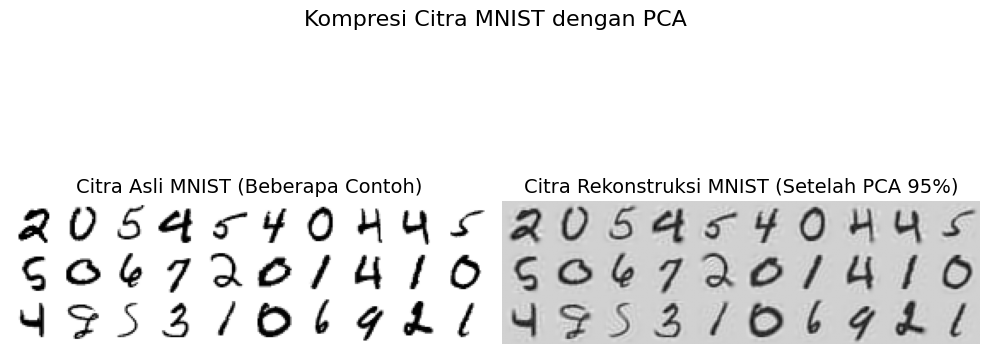


--- Incremental PCA ---
Bentuk MNIST setelah Incremental PCA: (60000, 154)
Perhatikan hasil yang mirip dengan PCA biasa.

--- Kernel PCA ---
Dataset Swiss Roll asli (3D):


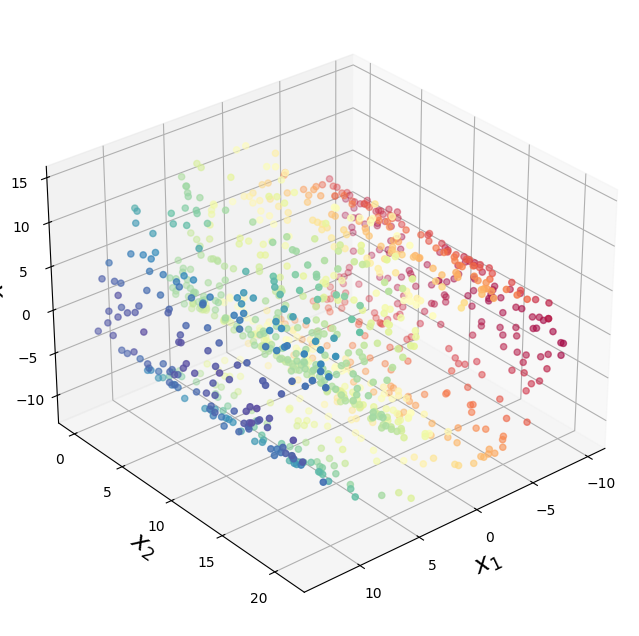

Melatih Kernel PCA dengan RBF kernel (gamma=0.04)...
Kernel PCA berhasil dilatih.

Data 2D setelah Kernel PCA (RBF):


/tmp/ipython-input-3-2227506910.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral")


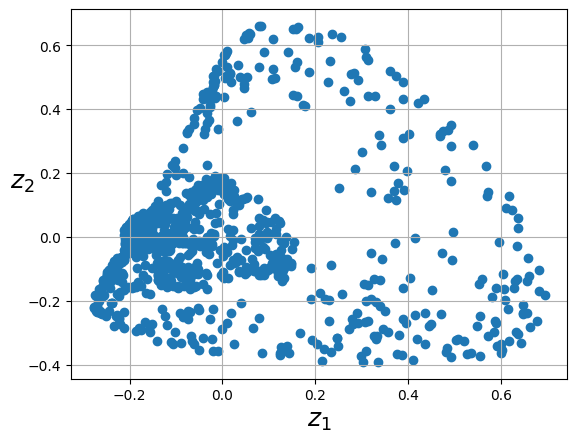


--- Menyetel Kernel PCA dengan GridSearchCV (Moons Dataset) ---
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best hyperparameters ditemukan: {'kpca__gamma': np.float64(0.05), 'kpca__kernel': 'rbf'}
Best score (akurasi): 0.8460

--- Rekonstruksi Pre-image dengan Kernel PCA ---
Error rekonstruksi pre-image Kernel PCA (RBF): 98.3589

--- Locally Linear Embedding (LLE) ---
Melatih LLE pada Swiss Roll dataset...
LLE berhasil dilatih.

Data 2D setelah LLE (Swiss Roll):


/tmp/ipython-input-3-2227506910.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral")


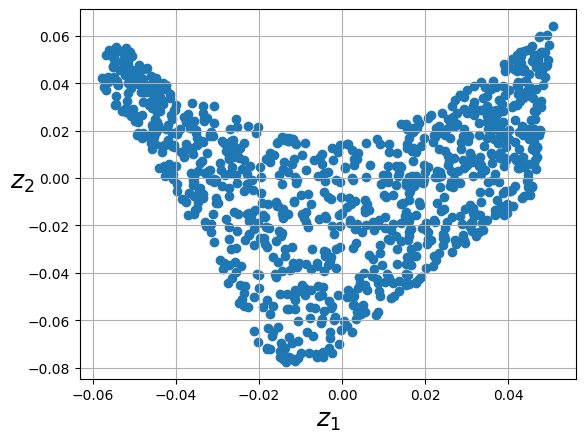

Perhatikan LLE berhasil membuka gulungan Swiss Roll.

--- Selesai Reproduksi Kode Chapter 8 ---


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Untuk plot 3D
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_swiss_roll, fetch_openml, make_moons # Tambahkan make_moons impor di sini

# Fungsi pembantu untuk visualisasi
def plot_3d_dataset(X, angle=50, elevation=30):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 0], cmap=plt.cm.Spectral)
    ax.view_init(elev=elevation, azim=angle)
    ax.set_xlabel("$x_1$", fontsize=18)
    ax.set_ylabel("$x_2$", fontsize=18)
    ax.set_zlabel("$x_3$", fontsize=18)
    plt.show()

def plot_2d_projection(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral")
    plt.xlabel("$z_1$", fontsize=18)
    plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
    plt.show()

# --- 1. Kutukan Dimensionalitas (Illustrasi Konseptual) ---
# Tidak ada kode langsung untuk "kutukan dimensionalitas" itu sendiri,
# tetapi PCA adalah cara untuk mengatasinya.

print("--- The Curse of Dimensionality (Konseptual) ---")
print("Semakin tinggi dimensi, semakin jarang (sparse) data,")
print("membuat pencarian pola menjadi sulit dan risiko overfitting tinggi.")

# --- 2. PCA (Principal Component Analysis) ---

# a. Membuat Dataset 3D Contoh (mirip swiss roll datar)
np.random.seed(42)
m = 200
X_3d = np.random.rand(m, 3) * 10
# Buat data cenderung datar di bidang tertentu
X_3d[:, 1] = X_3d[:, 0] * 0.5 + np.random.randn(m) * 0.1
X_3d[:, 2] = X_3d[:, 0] * 0.2 + np.random.randn(m) * 0.1

print("\n--- PCA (Principal Component Analysis) ---")
print("Dataset 3D asli:")
plot_3d_dataset(X_3d, angle=60, elevation=30)

# b. PCA dengan Scikit-Learn
# Mengurangi dimensi menjadi 2
scaler_pca = StandardScaler()
X_scaled = scaler_pca.fit_transform(X_3d)

pca = PCA(n_components=2)
X_2d_pca = pca.fit_transform(X_scaled)

print(f"Bentuk data asli (3D): {X_scaled.shape}")
print(f"Bentuk data setelah PCA (2D): {X_2d_pca.shape}")

print("\nData 2D setelah Proyeksi PCA:")
plot_2d_projection(X_2d_pca)

# c. Explained Variance Ratio
# Proporsi variansi dataset yang berada di sepanjang setiap komponen utama.
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_) # Harapannya, dua komponen pertama menjelaskan sebagian besar variansi.
print(f"Total Explained Variance (2 komponen): {pca.explained_variance_ratio_.sum():.4f}")


# d. Memilih Jumlah Dimensi yang Tepat
# Menggunakan kumulatif explained variance
pca_full = PCA()
pca_full.fit(X_scaled)
cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(cumsum_variance, linewidth=3)
plt.xlabel("Jumlah Dimensi")
plt.ylabel("Explained Variance Kumulatif")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=np.argmax(cumsum_variance >= 0.95) + 1, color='r', linestyle='--')
plt.title("Explained Variance Kumulatif vs. Jumlah Dimensi")
plt.show()

# Jumlah dimensi untuk mempertahankan 95% variansi
d_95_percent = np.argmax(cumsum_variance >= 0.95) + 1
print(f"Jumlah dimensi yang diperlukan untuk mempertahankan 95% variansi: {d_95_percent}")

# Atau langsung diatur n_components sebagai float
pca_95 = PCA(n_components=0.95)
X_reduced_95 = pca_95.fit_transform(X_scaled)
print(f"Bentuk data setelah PCA (95% variansi): {X_reduced_95.shape}")

# e. PCA untuk Kompresi (Contoh MNIST)
print("\n--- PCA untuk Kompresi (MNIST) ---")
mnist_original = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X_mnist = mnist_original["data"] / 255.0 # Skalakan ke 0-1
y_mnist = mnist_original["target"].astype(np.uint8)

# Pisahkan data untuk menghindari data snooping
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(X_mnist, y_mnist, test_size=1/7, random_state=42) # Sekitar 60k/10k

pca_mnist = PCA(n_components=0.95) # Pertahankan 95% variansi
X_reduced_mnist = pca_mnist.fit_transform(X_train_mnist)

print(f"Bentuk MNIST asli: {X_train_mnist.shape}")
print(f"Bentuk MNIST setelah PCA (95% variansi): {X_reduced_mnist.shape}")
print(f"Jumlah komponen yang dipilih PCA: {pca_mnist.n_components_}")

# Dekompresi (rekonstruksi)
X_recovered_mnist = pca_mnist.inverse_transform(X_reduced_mnist)

# Visualisasikan citra asli vs rekonstruksi
def plot_digits(instances, images_per_row=5, cmap="binary", fontsize=12):
    size = instances.shape[1]
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        r_images = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(r_images, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=cmap)
    plt.axis("off")

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Citra Asli MNIST (Beberapa Contoh)", fontsize=14)
plot_digits(X_train_mnist[::2000].reshape(-1, 28, 28), images_per_row=10, cmap="binary")

plt.subplot(122)
plt.title("Citra Rekonstruksi MNIST (Setelah PCA 95%)", fontsize=14)
plot_digits(X_recovered_mnist[::2000].reshape(-1, 28, 28), images_per_row=10, cmap="binary")

plt.suptitle("Kompresi Citra MNIST dengan PCA", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# f. Incremental PCA (untuk dataset besar yang tidak muat di memori)
print("\n--- Incremental PCA ---")
n_batches = 100
inc_pca = IncrementalPCA(n_components=154) # Menggunakan n_components yang sama dengan 95% variansi MNIST

# Iterasi melalui mini-batch
# X_train_mnist perlu dipecah ke batch
batch_size = len(X_train_mnist) // n_batches
for X_batch in np.array_split(X_train_mnist, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced_inc_pca = inc_pca.transform(X_train_mnist)
print(f"Bentuk MNIST setelah Incremental PCA: {X_reduced_inc_pca.shape}")
print("Perhatikan hasil yang mirip dengan PCA biasa.")


# --- 3. Kernel PCA ---

# Membuat dataset Swiss Roll (contoh manifold non-linier)
X_swiss, t_swiss = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

print("\n--- Kernel PCA ---")
print("Dataset Swiss Roll asli (3D):")
plot_3d_dataset(X_swiss)

# a. Kernel PCA dengan RBF Kernel
rbf_kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04, random_state=42)
print("Melatih Kernel PCA dengan RBF kernel (gamma=0.04)...")
X_reduced_rbf_kpca = rbf_kpca.fit_transform(X_swiss)
print("Kernel PCA berhasil dilatih.")

print("\nData 2D setelah Kernel PCA (RBF):")
plot_2d_projection(X_reduced_rbf_kpca)

# b. Memilih Kernel dan Menyetel Hyperparameter (GridSearchCV)
# Menggunakan dataset moons (karena lebih cepat untuk demonstrasi GridSearchCV)
# FIX: Inisialisasi X_moons dan y_moons di sini
X_moons, y_moons = make_moons(n_samples=1000, noise=0.30, random_state=42)
# Kali ini, kita akan menggunakan PCA sebagai langkah pre-processing untuk klasifikasi.

# Pipeline: Kernel PCA -> Logistic Regression
clf_kpca_logreg = Pipeline([
    ("kpca", KernelPCA(n_components=2, random_state=42)),
    ("log_reg", LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000))
])

param_grid_kpca = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

print("\n--- Menyetel Kernel PCA dengan GridSearchCV (Moons Dataset) ---")
grid_search_kpca = GridSearchCV(clf_kpca_logreg, param_grid_kpca, cv=3, verbose=2, n_jobs=-1)
grid_search_kpca.fit(X_moons, y_moons)

print(f"\nBest hyperparameters ditemukan: {grid_search_kpca.best_params_}")
print(f"Best score (akurasi): {grid_search_kpca.best_score_:.4f}")

# c. Rekonstruksi Pre-image (untuk evaluasi tanpa pengawasan)
print("\n--- Rekonstruksi Pre-image dengan Kernel PCA ---")
# Melatih KernelPCA dengan fit_inverse_transform=True
rbf_kpca_inverse = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                           fit_inverse_transform=True, random_state=42)
X_reduced_rbf_kpca_inverse = rbf_kpca_inverse.fit_transform(X_swiss)
X_preimage_rbf_kpca = rbf_kpca_inverse.inverse_transform(X_reduced_rbf_kpca_inverse)

# Hitung error rekonstruksi
reconstruction_error_kpca = np.mean(np.sum(np.square(X_swiss - X_preimage_rbf_kpca), axis=1))
print(f"Error rekonstruksi pre-image Kernel PCA (RBF): {reconstruction_error_kpca:.4f}")


# --- 4. Locally Linear Embedding (LLE) ---

print("\n--- Locally Linear Embedding (LLE) ---")
# Menggunakan dataset Swiss Roll
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42, n_jobs=-1)
print("Melatih LLE pada Swiss Roll dataset...")
X_reduced_lle = lle.fit_transform(X_swiss)
print("LLE berhasil dilatih.")

print("\nData 2D setelah LLE (Swiss Roll):")
plot_2d_projection(X_reduced_lle)
print("Perhatikan LLE berhasil membuka gulungan Swiss Roll.")

print("\n--- Selesai Reproduksi Kode Chapter 8 ---")
